In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score,f1_score,accuracy_score,recall_score,precision_score,mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from statsmodels.api import OLS
from xgboost import XGBClassifier,XGBRegressor


In [388]:
train = pd.read_csv('train.csv')
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [389]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [390]:
acre_index = train[train['lot_size_units'] == 'acre'].index

In [391]:
train.loc[acre_index,'lot_size'] = train.loc[acre_index,'lot_size'] * 43560
train.loc[acre_index,'lot_size_units'] = 'sqft'

In [392]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [393]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1.669000e+03,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,1.878995e+04,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2.880682e+05,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,5.000000e+02,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,2.734000e+03,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,5.000000e+03,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,7.389000e+03,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,1.089000e+07,98199.000000,2.500000e+07


# Searching for Outliers and Dropping them

C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


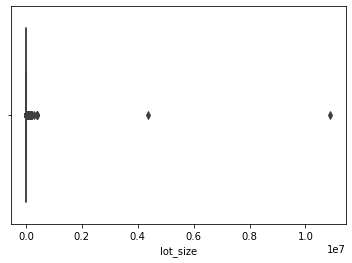

In [394]:
sns.boxplot('lot_size',data=train)
plt.show()

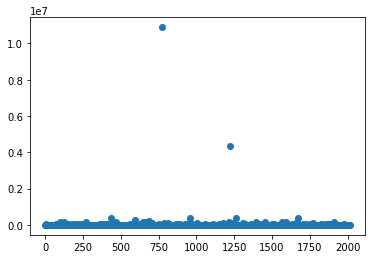

In [395]:
plt.scatter(train['lot_size'].index , train['lot_size'].values)
plt.show()

In [396]:
outliers= train['lot_size'].sort_values(ascending=False).head(73).index

In [397]:
train.drop(outliers,inplace =True) # dropping outliers

In [398]:
train['lot_size'].sort_values(ascending=False).head(30)

419     37461.6
1322    33541.2
194     32670.0
1832    30492.0
1229    30492.0
819     30492.0
1870    29620.8
1147    29620.8
1442    28749.6
1500    28749.6
1112    27878.4
364     25700.4
361     25700.4
1188    25264.8
1858    23522.4
628     23522.4
657     23522.4
2006    23086.8
362     23086.8
637     22651.2
646     22651.2
901     22215.6
2011    21780.0
88      21780.0
43      21344.4
1536    20908.8
972     20037.6
1863    19166.4
195     18730.8
1109    18730.8
Name: lot_size, dtype: float64

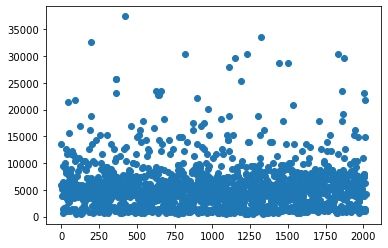

In [399]:
plt.scatter(train['lot_size'].index , train['lot_size'].values)
plt.show()

In [400]:
train['size'].sort_values(ascending=False).head(50)

232     11010.0
74       8660.0
1862     7636.0
1554     6990.0
1616     6240.0
805      5770.0
1945     5704.0
518      5690.0
1190     5210.0
548      5200.0
1640     5200.0
964      5090.0
1814     5020.0
1998     4990.0
750      4790.0
1960     4693.0
1649     4641.0
1934     4639.0
1061     4570.0
1773     4530.0
7        4510.0
810      4510.0
580      4490.0
668      4397.0
1781     4350.0
904      4299.0
1208     4260.0
1279     4240.0
219      4210.0
1178     4194.0
1409     4190.0
630      4180.0
1242     4060.0
1979     4050.0
1846     4040.0
61       4040.0
938      4018.0
1039     4010.0
815      4006.0
1067     4002.0
200      3960.0
1315     3960.0
624      3960.0
186      3956.0
429      3940.0
1708     3930.0
1019     3930.0
693      3884.0
1544     3880.0
1876     3880.0
Name: size, dtype: float64

In [401]:
train = train[train['size'] < 4100]
train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [402]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,1911.000000,1911.000000,1911.000000,1564.000000,1911.000000,1.911000e+03
mean,2.841444,2.133176,1693.137101,5448.877749,98123.764521,9.387157e+05
std,1.199249,0.957023,790.380796,4375.183875,22.919230,9.211139e+05
min,1.000000,0.500000,376.000000,500.000000,98101.000000,1.594880e+05
25%,2.000000,1.500000,1070.000000,2499.750000,98108.000000,6.050000e+05
50%,3.000000,2.000000,1560.000000,5000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2203.000000,6800.000000,98126.000000,1.096500e+06
max,14.000000,9.000000,4060.000000,37461.600000,98199.000000,2.500000e+07


In [403]:
train['lot_size'].fillna(train['lot_size'].median(), inplace=True)
train['lot_size_units'].fillna('sqft', inplace=True)
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,5000.0,sqft,98102,950000.0


In [404]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1.911000e+03
mean,2.841444,2.133176,1693.137101,5367.370382,98123.764521,9.387157e+05
std,1.199249,0.957023,790.380796,3961.630995,22.919230,9.211139e+05
min,1.000000,0.500000,376.000000,500.000000,98101.000000,1.594880e+05
25%,2.000000,1.500000,1070.000000,3200.000000,98108.000000,6.050000e+05
50%,3.000000,2.000000,1560.000000,5000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2203.000000,6180.000000,98126.000000,1.096500e+06
max,14.000000,9.000000,4060.000000,37461.600000,98199.000000,2.500000e+07


In [405]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1911 non-null   int64  
 1   baths           1911 non-null   float64
 2   size            1911 non-null   float64
 3   size_units      1911 non-null   object 
 4   lot_size        1911 non-null   float64
 5   lot_size_units  1911 non-null   object 
 6   zip_code        1911 non-null   int64  
 7   price           1911 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 134.4+ KB


In [406]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,5000.0,sqft,98102,950000.0


In [407]:
train['baths'].value_counts()

2.0    601
1.0    472
2.5    272
3.0    194
3.5    163
1.5    127
4.0     35
5.0     16
4.5     15
5.5     10
6.0      2
8.5      1
0.5      1
7.0      1
9.0      1
Name: baths, dtype: int64

In [228]:
train['beds'].value_counts()

3     629
2     527
4     386
1     238
5     107
6      15
9       5
8       2
14      1
7       1
Name: beds, dtype: int64

In [408]:
outliers_price = train['price'].sort_values(ascending=False).head(4).index
train.drop(outliers_price,inplace=True)

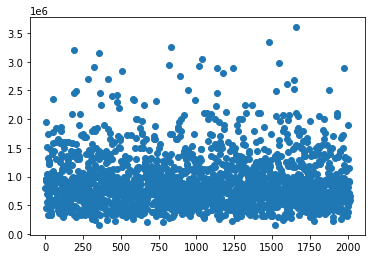

In [409]:
plt.scatter(train['price'].index , train['price'].values)
plt.show()

In [410]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,5000.0,sqft,98102,950000.0


In [411]:
train['zip_code'].value_counts()

98103    158
98115    156
98117    146
98144    103
98122    103
98118     96
98116     85
98107     80
98106     78
98125     77
98126     74
98199     72
98119     66
98105     63
98136     58
98109     58
98133     57
98121     55
98102     54
98112     49
98178     43
98168     41
98146     38
98108     33
98177     26
98101     23
98104     14
98164      1
Name: zip_code, dtype: int64

In [413]:
tdata = train.drop(['size_units','lot_size_units','price'],axis = 1)
price = train['price']
tdata.head()

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.0,98144
1,4,2.0,2240.0,13503.6,98106
2,4,3.0,2040.0,3783.0,98107
3,4,3.0,3800.0,5175.0,98199
4,2,2.0,1042.0,5000.0,98102


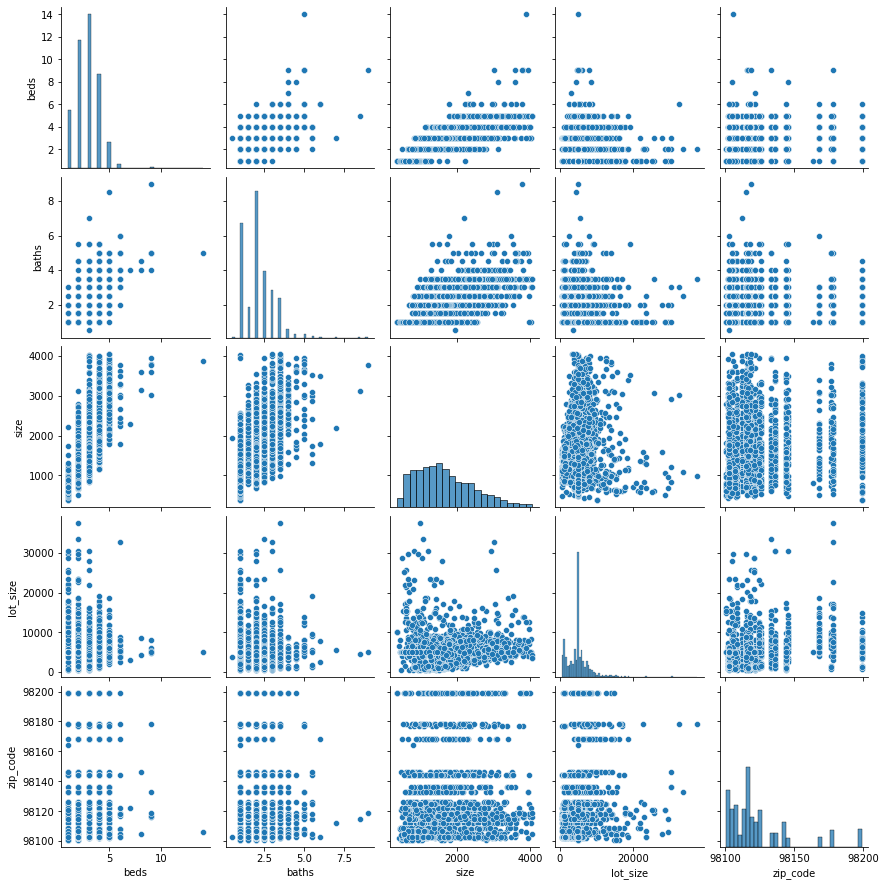

In [241]:
sns.pairplot(tdata)
plt.show()

In [412]:
train = train[train['zip_code'] != 98164]

In [265]:
tdata['zip_code'].value_counts()

98103    158
98115    156
98117    146
98122    103
98144    103
98118     96
98116     85
98107     80
98106     78
98125     77
98126     74
98199     72
98119     66
98105     63
98109     58
98136     58
98133     57
98121     55
98102     54
98112     49
98178     43
98168     41
98146     38
98108     33
98177     26
98101     23
98104     14
Name: zip_code, dtype: int64

In [414]:
tdata['zip_code'] = tdata['zip_code'].astype('category')
tdata

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.0,98144
1,4,2.0,2240.0,13503.6,98106
2,4,3.0,2040.0,3783.0,98107
3,4,3.0,3800.0,5175.0,98199
4,2,2.0,1042.0,5000.0,98102
...,...,...,...,...,...
2011,3,2.0,1370.0,21780.0,98112
2012,1,1.0,889.0,5000.0,98121
2013,4,2.0,2140.0,6250.0,98199
2014,2,2.0,795.0,5000.0,98103


In [415]:
data = pd.get_dummies(tdata)
data

,beds,baths,size,lot_size,zip_code_98101,zip_code_98102,zip_code_98103,zip_code_98104,zip_code_98105,zip_code_98106,...,zip_code_98125,zip_code_98126,zip_code_98133,zip_code_98136,zip_code_98144,zip_code_98146,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98199
0,3,2.5,2590.0,6000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4,2.0,2240.0,13503.6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,3.0,2040.0,3783.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.0,3800.0,5175.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,2.0,1042.0,5000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,21780.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,1,1.0,889.0,5000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,4,2.0,2140.0,6250.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2014,2,2.0,795.0,5000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [416]:
scaller = StandardScaler()
scalled_data = scaller.fit_transform(data)
PRICE = np.log(price)

In [417]:
X_train, X_cv , y_train, y_cv = train_test_split(scalled_data, PRICE, test_size=0.2 , random_state=123)

In [418]:
simple_model = LinearRegression()
simple_model.fit(X_train,y_train)
predictions = simple_model.predict(X_cv)
SCORE = r2_score(y_cv,predictions)
MAE = mean_absolute_error(predictions,y_cv)
MSE = mean_squared_error(predictions,y_cv)
RMSE = np.sqrt(MSE)
m1 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['Simple_linear'])
m1

,MAE,MSE,SCORE,RMSE
Simple_linear,0.206578,0.077919,0.626849,0.279141


In [419]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)
predictionf = forest_model.predict(X_cv)
SCORE = r2_score(y_cv,predictionf)
MAE = mean_absolute_error(predictionf,y_cv)
MSE = mean_squared_error(predictionf,y_cv)
RMSE = np.sqrt(MSE)
m2 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['Random_Forst'])
m2

,MAE,MSE,SCORE,RMSE
Random_Forst,0.176715,0.062585,0.700285,0.25017


In [420]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
predictiont = tree_model.predict(X_cv)
SCORE = r2_score(y_cv,predictiont)
MAE = mean_absolute_error(predictiont,y_cv)
MSE = mean_squared_error(predictiont,y_cv)
RMSE = np.sqrt(MSE)
m3 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['Decision'])
m3

,MAE,MSE,SCORE,RMSE
Decision,0.230158,0.099724,0.52243,0.315791


In [421]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
predictionx = xgb.predict(X_cv)
SCORE = r2_score(y_cv,predictionx)
MAE = mean_absolute_error(predictionx,y_cv)
MSE = mean_squared_error(predictionx,y_cv)
RMSE = np.sqrt(MSE)
m4 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['XGB'])
m4

,MAE,MSE,SCORE,RMSE
XGB,0.169804,0.060918,0.70827,0.246815


# Tunning RandomForest Model

In [422]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=20)]
max_depth = [int(x) for x in np.linspace(start=10,stop=100,num=10)]
max_depth.append(None)
max_features = ['auto','sqrt']
bootstrap = [False,True]
min_samples_leaf = [1,2,5]
min_samples_split = [2,5,10]
random_grid={
    'n_estimators' : n_estimators,
    'max_depth': max_depth,
    'max_features' : max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features' : max_features,
    'bootstrap' : bootstrap
}

Forest_model_tunned = RandomForestRegressor()
grid_forest = RandomizedSearchCV(estimator=Forest_model_tunned, param_distributions=random_grid, verbose=2 , cv=3 , n_iter= 100,n_jobs=-1)
grid_forest.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
 

In [423]:
grid_forest.best_params_

{'n_estimators': 1900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [424]:
new_predict = grid_forest.best_estimator_.predict(X_cv)
SCORE = r2_score(new_predict,y_cv)
MAE = mean_absolute_error(y_cv,new_predict)
MSE = mean_squared_error(new_predict,y_cv)
RMSE = np.sqrt(MSE)

m5 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['Random_Forst_tunned'])
m5

,MAE,MSE,SCORE,RMSE
Random_Forst_tunned,0.164792,0.055852,0.643727,0.236329


# Tunning XGB Model

In [425]:
max_depthX = [int(x) for x in np.linspace(start=2,stop=20,num=10)]
learning_rate = [float(x) for x in np.linspace(start=0.01,stop=0.3,num=10)]
n_estimatorsX = [int(x) for x in np.linspace(start=100,stop=1000,num=20)]
params = { 'max_depth': max_depthX,
           'learning_rate': learning_rate,
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': n_estimatorsX
}



xgb_tunned = XGBRegressor()
grid_xgb = RandomizedSearchCV(estimator=xgb_tunned, param_distributions=params,verbose=2, n_iter=100,cv=3,n_jobs=-1)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                          0.042222222222222223,
                           

In [426]:
grid_xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 857,
 'max_depth': 16,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.4}

In [427]:
new_predict_xgb = grid_xgb.best_estimator_.predict(X_cv)
SCORE = r2_score(y_cv,new_predict_xgb)
MAE = mean_absolute_error(new_predict_xgb,y_cv)
MSE = mean_squared_error(new_predict_xgb,y_cv)
RMSE = np.sqrt(MSE)
m6 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['XGB_TUNNED'])
m6

,MAE,MSE,SCORE,RMSE
XGB_TUNNED,0.168615,0.057654,0.723901,0.240112


In [428]:
max_depthX = [int(x) for x in np.linspace(start=2,stop=20,num=5)]
learning_rate = [0.01,0.1,0.2,0.3]
n_estimatorsX = [int(x) for x in np.linspace(start=200,stop=1000,num=4)]
params = { 'max_depth': max_depthX,
           'learning_rate': learning_rate,
           'subsample': np.arange(0.6, 1.0, 0.2),
           'colsample_bytree': np.arange(0.6, 1.0, 0.2),
           'colsample_bylevel': np.arange(0.6, 1.0, 0.2),
           'n_estimators': n_estimatorsX}



xgb_tunned = XGBRegressor()
grid_xgb = GridSearchCV(estimator=xgb_tunned, param_grid=params,verbose=2, cv=3,n_jobs=-1)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [429]:
grid_xgb.best_params_

{'colsample_bylevel': 0.6,
 'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 11,
 'n_estimators': 1000,
 'subsample': 0.6}

In [430]:
prediction_grid = grid_xgb.best_estimator_.predict(X_cv)
SCORE = r2_score(y_cv,prediction_grid)
MAE = mean_absolute_error(prediction_grid,y_cv)
MSE = mean_squared_error(prediction_grid,y_cv)
RMSE = np.sqrt(MSE)
m7 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['XGB_TUNNED_GRID'])
m7

,MAE,MSE,SCORE,RMSE
XGB_TUNNED_GRID,0.166009,0.056362,0.730086,0.237407


# Tunning Decision Tree Model

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
predictiont = tree_model.predict(X_cv)
SCORE = r2_score(predictiont,y_cv)
MAE = mean_absolute_error(predictiont,y_cv)
MSE = mean_squared_error(predictiont,y_cv)
RMSE = np.sqrt(MSE)
m3 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['Decision'])
m3

In [431]:
splitter=['best','random']
max_depth=[int(x) for x in np.linspace(start=1,stop=10,num=10)]
max_depth.append(None)
min_samples_split=[2,5,7,9,12]
min_samples_leaf=[1,2,3,4,5]
max_features=['sqrt','auto']

param_grids = {
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'splitter':splitter
}

In [432]:
tree_tunned = DecisionTreeRegressor()
grid_tree = GridSearchCV(estimator=tree_tunned, param_grid=param_grids,cv=10,n_jobs=-1,verbose=2)
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 1100 candidates, totalling 11000 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 7, 9, 12],
                         'splitter': ['best', 'random']},
             verbose=2)

In [433]:
tn = grid_tree.best_estimator_.predict(X_cv)
SCORE = r2_score(tn,y_cv)
MAE = mean_absolute_error(y_cv,tn)
MSE = mean_squared_error(tn,y_cv)
RMSE = np.sqrt(MSE)
m8 = pd.DataFrame({"MAE":MAE, "MSE":MSE,'SCORE':SCORE,'RMSE':RMSE},index = ['Tree_tunned'])
m8

,MAE,MSE,SCORE,RMSE
Tree_tunned,0.213045,0.083671,0.493826,0.28926


In [434]:
grid_tree.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'random'}

In [435]:
result = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8],axis =0 )
result.sort_values(by='SCORE',ascending=False)

,MAE,MSE,SCORE,RMSE
XGB_TUNNED_GRID,0.166009,0.056362,0.730086,0.237407
XGB_TUNNED,0.168615,0.057654,0.723901,0.240112
XGB,0.169804,0.060918,0.708270,0.246815
Random_Forst,0.176715,0.062585,0.700285,0.250170
Random_Forst_tunned,0.164792,0.055852,0.643727,0.236329
Simple_linear,0.206578,0.077919,0.626849,0.279141
Decision,0.230158,0.099724,0.522430,0.315791
Tree_tunned,0.213045,0.083671,0.493826,0.289260


In [385]:
grid_forest.score(X_cv,y_cv)

0.7343512941436324